In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Taking Values from user
D = int(input("Enter Depth(ft)"))
d = np.arange(0 , (D+100) , 100)
MW = float(input("Enter mud weight(ppg)"))              # mud weight
K = float(input("Enter  kick(ppg)"))                #Kick Density
ID = float(input("Enter casing ID(inch)"))          #Casing ID
Dod = float(input("Enter drill string OD(inch)"))     # Drill String OD
V = float(input("Enter kick volume(bbls)"))        #Kick Volume in bbl
V1 = V * 5.615                                   #Kick Volume in ft3
#Creating Table
df = pd.DataFrame({"Depth": d})
df["HSP"] = 0.052*(MW)*(df["Depth"])               #Hydrosatic Pressure
df["FP"] = 0.052*(K)*(df["Depth"])               #Formation pressure
df["SIDPP"] = df["FP"] -df["HSP"]                   #Shut in Drill pipe pressure
AC = ((ID**2)-(Dod**2))/1029.4            #Annalus Capacity
h = ((V*5.615)/(AC*5.615))                             #Gas Influsx Height

df["SICP"] = (df["FP"]-(0.052*H+0.052*12.5*(df["Depth"]- h)))   # Shut in casing pressure
df["PAB"] = 390.281735 + (0.052* MW *df["Depth"])               # Pressure at bubble
df["V2"] = (6760 * V1 )/df["PAB"] 
df["H"] = df["V2"]/0.257709                            #Gas Influsx Height
df["BHP"] = 390.281735 + ((df["H"]*0.052) + (0.052*MW*(D-df["H"])))
df

Enter Depth(ft)10000
Enter mud weight(ppg)12.5
Enter  kick(ppg)13
Enter casing ID(inch)8.5
Enter drill string OD(inch)5
Enter kick volume(bbls)10


,Depth,HSP,FP,SIDPP,SICP,PAB,V2,H,BHP
0,0,0.0,0.0,0.0,130.281735,390.281735,972.564089,3773.884842,4633.498599
1,100,65.0,67.6,2.6,132.881735,455.281735,833.712339,3235.092056,4955.696686
2,200,130.0,135.2,5.2,135.481735,520.281735,729.554729,2830.924526,5197.388868
3,300,195.0,202.8,7.8,138.081735,585.281735,648.532112,2516.528769,5385.397531
4,400,260.0,270.4,10.4,140.681735,650.281735,583.706999,2264.984921,5535.820752
...,...,...,...,...,...,...,...,...,...
96,9600,6240.0,6489.6,249.6,379.881735,6630.281735,57.248548,222.144154,6757.439531
97,9700,6305.0,6557.2,252.2,382.481735,6695.281735,56.692760,219.987505,6758.729207
98,9800,6370.0,6624.8,254.8,385.081735,6760.281735,56.147660,217.872329,6759.994082
99,9900,6435.0,6692.4,257.4,387.681735,6825.281735,55.612942,215.797440,6761.234866


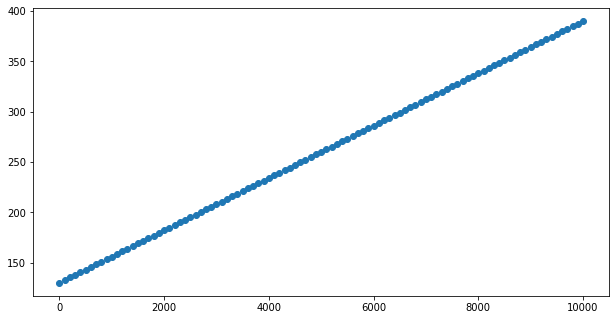

In [39]:
#Plotting curve

fig= plt.figure(figsize=(10,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
x=df["Depth"]
y=df["SICP"]
plt.scatter(x,y)

In [40]:
df.iloc[[50]]

,Depth,HSP,FP,SIDPP,SICP,PAB,V2,H,BHP
50,5000,3250.0,3380.0,130.0,260.281735,3640.281735,104.270501,404.605586,6648.327595
